In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
h5_index_file = os.path.join("..", "data", "interim", "H5Index", "h5_index_rankings.pkl")
os.path.isfile(h5_index_file)

True

In [4]:
# Load H5Index
with open(h5_index_file, "rb") as f:
    rankings = pickle.load(f)

In [5]:
print("Total number of publications crawled: {}.".format(len(rankings)))

Total number of publications crawled: 4540.


In [6]:
print("Number categories: {}.".format(len(rankings.category.unique())))
print("Number subcategories: {}.".format(len(rankings.subcategory.unique())))
print("Number rankings: {}.".format(len(rankings.h5_index)))
print("Number of publications per subcategory: 20.")

Number categories: 8.
Number subcategories: 194.
Number rankings: 4540.
Number of publications per subcategory: 20.


In [7]:
df = rankings.groupby("category")["subcategory"].agg(set).reset_index()
df["len"] = df.subcategory.apply(lambda x: len(x))
min_len = df["len"].min()
max_len = df["len"].max()

In [8]:
print("Mean number of subcategories: {}.".format(df["len"].mean()))
print("Min number of subcategories is {} for category {}.".format(min_len, list(df[df["len"] == min_len].category)[0]))
print("Max number of subcategories is {} for category {}.\n".format(max_len, list(df[df["len"] == max_len].category)[0]))

Mean number of subcategories: 28.375.
Min number of subcategories is 13 for category Business, Economics & Management.
Max number of subcategories is 50 for category Engineering & Computer Science.



In [9]:
conf = rankings[rankings["publication"].str.contains("Conference")]
workshops = rankings[rankings["publication"].str.contains("Workshop")]
len(conf) + len(workshops)

179

In [10]:
journals = rankings[rankings["publication"].str.contains("Journal")]
len(journals)

1492

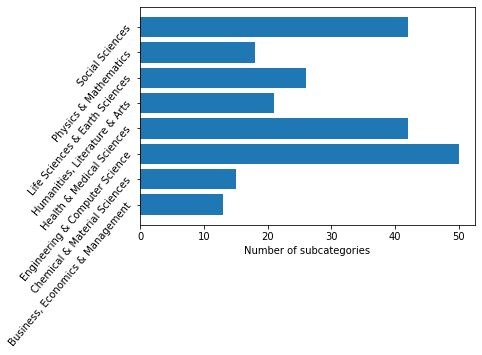

In [11]:
bars = list(df["len"])
labels = list(df["category"])
plt.barh(np.arange(len(bars)), bars)
plt.xlabel('Number of subcategories')
plt.yticks(np.arange(8), labels, rotation=50)
plt.show()

In [20]:
agg_publications = rankings.groupby("category")["publication"].agg(set).reset_index()
agg_publications["len"] = agg_publications.publication.apply(lambda x: len(x))
min_len = agg_publications["len"].min()
max_len = agg_publications["len"].max()

In [21]:
min_len, max_len

(247, 950)

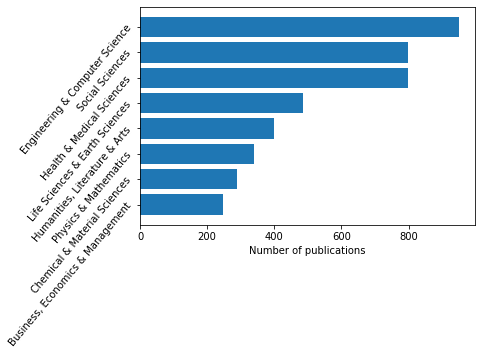

In [23]:
agg_publications = agg_publications.sort_values("len")
bars = list(agg_publications["len"])
labels = list(agg_publications["category"])
plt.barh(np.arange(len(bars)), bars)
plt.xlabel('Number of publications')
plt.yticks(np.arange(8), labels, rotation=50)
plt.show()